<a href="https://colab.research.google.com/github/yanshiyou123/NLP/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

6320NLP HW4

Author: Shiyou Yan

The dataset consists of text data sourced from social media platforms, each labeled with specific emotions like happiness, sadness, anger, or fear. The model's task is to predict the emotion conveyed in a given text. Due to the dataset's large size of 393,822 instances, only the first 20,000 instances are selected for training and testing purposes.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                text  label
0      i just feel really helpless and heavy hearted      4
1  ive enjoyed being able to slouch about relax a...      0
2  i gave up my internship with the dmrg and am f...      4
3                         i dont know i feel so lost      0
4  i am a kindergarten teacher and i am thoroughl...      4


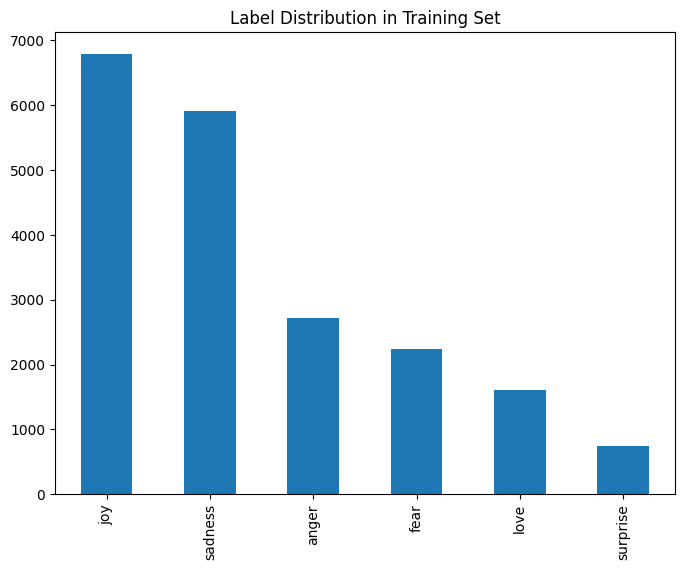

0                   feel really helpless heavy hearted
1    ive enjoyed able slouch relax unwind frankly n...
2              gave internship dmrg feeling distraught
3                                  dont know feel lost
4    kindergarten teacher thoroughly weary job take...
Name: text, dtype: object
Epoch 1/10
500/500 [==============================] - 33s 64ms/step - loss: 1.0963 - accuracy: 0.5969 - val_loss: 0.5081 - val_accuracy: 0.8325
Epoch 2/10
500/500 [==============================] - 16s 32ms/step - loss: 0.2837 - accuracy: 0.9081 - val_loss: 0.4732 - val_accuracy: 0.8385
Epoch 3/10
500/500 [==============================] - 16s 33ms/step - loss: 0.1233 - accuracy: 0.9624 - val_loss: 0.4804 - val_accuracy: 0.8422
Epoch 4/10
500/500 [==============================] - 17s 33ms/step - loss: 0.0664 - accuracy: 0.9791 - val_loss: 0.4910 - val_accuracy: 0.8543
Epoch 5/10
500/500 [==============================] - 15s 30ms/step - loss: 0.0455 - accuracy: 0.9858 - val_loss: 0.5418 - 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import string
import nltk
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras import layers
from keras.models import Sequential
from keras.utils import to_categorical

# download stopwrods
nltk.download('stopwords')
# load data
data = pd.read_csv('emotion.csv')

# drop
data = data.drop(data.columns[0], axis=1)
print(data.head())


label_names = {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}
data['label'] = data['label'].map(label_names)

# plot label distribution
plt.figure(figsize=(8, 6))
data['label'].value_counts().plot(kind='bar')
plt.title('Label Distribution in Training Set')
plt.show()

# preprocess
def preprocess(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])  # Remove punctuation
    words_cleaned = text.split()
    words_cleaned = ' '.join([word for word in words_cleaned if word not in stopwords.words('english')])  # Remove stopwords
    return words_cleaned

tokenizer = Tokenizer()
data['text'] = data['text'].apply(preprocess)
texts_cleaned = data['text']
print(texts_cleaned.head())

# split into train/test
X_train, X_test, y_train, y_test = train_test_split(texts_cleaned, data['label'], test_size=0.2, random_state=42)


# tokenize
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
max_length = max([len(seq) for seq in X_train_seq])
X_train_padded = keras.preprocessing.sequence.pad_sequences(X_train_seq, maxlen=max_length)
X_test_padded = keras.preprocessing.sequence.pad_sequences(X_test_seq, maxlen=max_length)

# sequential model and evaluate on the test data
# RNN, CNN, LSTM
RNN_model = Sequential([
        layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, mask_zero=True),
        layers.SimpleRNN(64),
        layers.Dense(6, activation='softmax')
    ])

CNN_model = Sequential([
        layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=X_train_padded.shape[1]),
        layers.Conv1D(128, 5, activation='relu'),
        layers.GlobalMaxPooling1D(),
        layers.Dense(6, activation='softmax')
    ])


LSTM_model = Sequential([
        layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, mask_zero=True),
        layers.LSTM(64),
        layers.Dense(6, activation='softmax')
    ])


# Compile RNN model

label_names = {v: k for k, v in label_names.items()}
y_train_encoded = y_train.map(label_names)
y_test_encoded = y_test.map(label_names)


RNN_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
CNN_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
LSTM_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train RNN model

RNN_model.fit(X_train_padded, y_train_encoded, epochs=10, validation_data=(X_test_padded, y_test_encoded))
CNN_model.fit(X_train_padded, y_train_encoded, epochs=10, validation_data=(X_test_padded, y_test_encoded))
LSTM_model.fit(X_train_padded, y_train_encoded, epochs=10, validation_data=(X_test_padded, y_test_encoded))
# Evaluate RNN model on test data
loss, accuracy = RNN_model.evaluate(X_test_padded, y_test_encoded)
print(f'RNN Model Test Loss: {loss:.4f}')
print(f'RNN Model Test Accuracy: {accuracy:.4f}')
# Evaluate CNN model on test data
loss, accuracy = CNN_model.evaluate(X_test_padded, y_test_encoded)
print(f'CNN Model Test Loss: {loss:.4f}')
print(f'CNN Model Test Accuracy: {accuracy:.4f}')
# Evaluate LSTM model on test data
loss, accuracy = LSTM_model.evaluate(X_test_padded, y_test_encoded)
print(f'LSTM Model Test Loss: {loss:.4f}')
print(f'LSTM Model Test Accuracy: {accuracy:.4f}')

Analysis:

After comprehensive testing, it was found that the CNN model achieved the highest test accuracy of 0.9208, followed by the LSTM model with an accuracy of 0.8978. The RNN model yielded a slightly lower accuracy of 0.8255. These results indicate that the CNN architecture performed best in capturing local patterns, while the LSTM excelled in modeling long-term dependencies. In the result, the CNN architecture was effective in capturing and recognizing the relevant patterns and features within the textual information, demonstrating its suitability for this particular sentiment analysis task.